# Multiclass Classification Rock-Paper-Scissors

You can get the dataset by clickiing at this link :
- https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
- https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%matplotlib inline

In [3]:
# Defining the directories

base_dir = '../Rock-Paper-Scissor'
train_dir = os.path.join(base_dir,'rps-train-set')
validation_dir = os.path.join(base_dir,'rps-test-set')

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.3,
                                    zoom_range=0.3, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  )
test_datagen = ImageDataGenerator(rescale=1./255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    class_mode='categorical',
                                                    batch_size=20,
                                                   )
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                 target_size=(150,150),
                                                 class_mode='categorical',
                                                 batch_size=20)



Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [21]:
# Creating the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    
])


# model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
              metrics=['accuracy']
             )
history = model.fit_generator(train_generator,
                              epochs = 30,
                              validation_data = test_generator,
                              steps_per_epoch=20,
                              validation_steps = 3)
model.save("rps.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/30
20/20 [==============================] - 3s 170ms/step - loss: 1.9928 - accuracy: 0.3675 - val_loss: 1.1190 - val_accuracy: 0.3000
Epoch 2/30
20/20 [==============================] - 3s 140ms/step - loss: 1.1098 - accuracy: 0.3325 - val_loss: 1.0945 - val_accuracy: 0.5000
Epoch 3/30
20/20 [==============================] - 3s 137ms/step - loss: 1.1003 - accuracy: 0.3350 - val_loss: 1.0742 - val_accuracy: 0.4333
Epoch 4/30
20/20 [==============================] - 3s 134ms/step - loss: 1.1035 - accuracy: 0.3575 - val_loss: 1.0873 - val_accuracy: 0.5833
Epoch 5/30
20/20 [==============================] - 3s 136ms/step - loss: 1.1007 - accuracy: 0.3650 - val_loss: 1.0522 - val_accuracy: 0.4333
Epoch 6/30
20/20 [==============================] - 3s 133ms/step - loss: 1.1083 - accuracy: 0.4050 - val_loss: 1.2020 - val_accuracy: 0.2833
Epoch 7/30
20/20 [==============================] - 3s 13

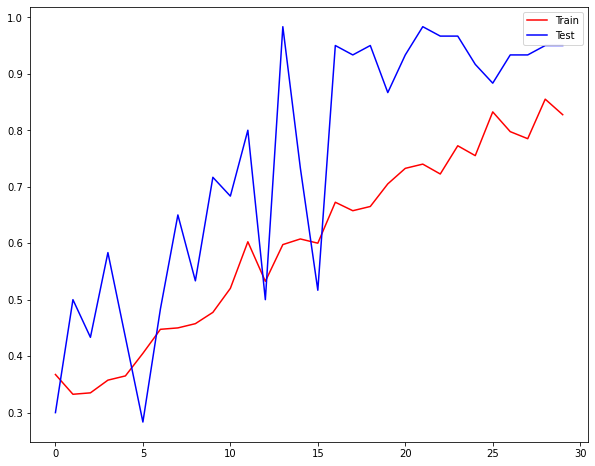

In [25]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend(['Train','Test'],loc='best')

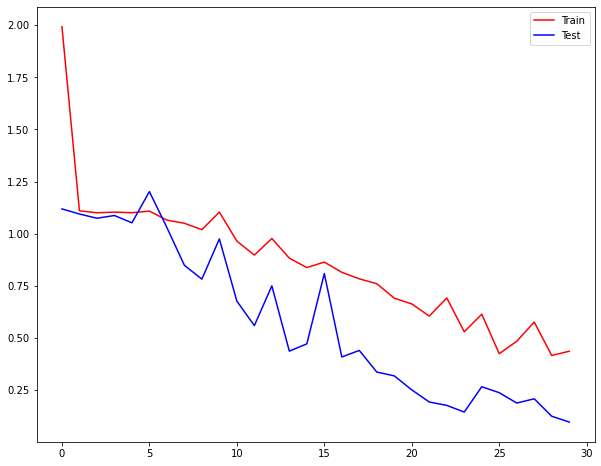

In [24]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend(['Train','Test'],loc='best')

In [27]:
# code for google colab prediction 

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    
    path = fn
    img = image.load_img(path,target_size=(150,150)),
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images,batch_size=10)
    print(fn)
    print(classes)


In [75]:
from ipywidgets import FileUpload
upload = FileUpload(accept='.png',description='submit kr')
upload

FileUpload(value={}, accept='.png', description='submit kr')

In [79]:
with open("input.png", "w+b") as i:
    i.write(upload.data[0])


IndexError: list index out of range

In [80]:
import ipywidgets as widgets

widgets.widgets.DOMWidget.widgets

{'7b24db13b6ed4f4c9e45e3c8a9b66030': Layout(),
 'e1b4159cb3f34949ae8848e982ba56e6': ButtonStyle(),
 '702f812d6c6e47fa98f796c0341d512a': FileUpload(value={}, accept='.txt', description='Upload'),
 'd98a71d33fd448bcbaf8afe5964a201a': Layout(),
 'c55417d0a9eb416dbbd8548f570f1dd0': Box(),
 '325f600dc75044a888f878b32e8ba394': Layout(),
 '187146f4510b43a1a06af81ef912d8eb': Box(),
 '8505a23db2b842c183081894909cbc16': Layout(),
 'e4302743bf264ce1b1a041d6947fb573': DescriptionStyle(),
 'fce85bd3e258469f99c7dce3dff8373d': Text(value='Hello World!', disabled=True),
 'a71abfbb138a4a2097c54e2d3ccbb575': Layout(),
 '23b6d69198654eb79de38034a99b80d0': DescriptionStyle(),
 '66bcb4e5647943c6a3d51d8f86058742': Text(value='abhishek maity'),
 '5c3375b836d24411ac21976285aa9d51': Layout(),
 '5b2de83f4f8a43c7878adf9d9feeb9d2': DescriptionStyle(),
 'f737fa60cd5b417cb7c3f143db2569f8': Text(value='Hello World!'),
 '8d52d8790d11465ea46896514415f564': Layout(),
 '3d13eb77c5f84b6ca94dcc7d4ed12fbe': DOMWidget(),
 '